In [1]:
from TrainDQN import TrainDQN
from copy import deepcopy
import networks

use_wandb = False
force_device = "cpu"
no_plot = True

# list of the track variables
track_list = []

/home/luke/.local/lib/python3.6/site-packages/torch/distributed/distributed_c10d.py:171: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  "torch.distributed.reduce_op is deprecated, please use "


In [2]:
# now load the trainings
names = [
  "luke-PC_15:39_A3",
  "luke-PC_15:39_A8",
  "luke-PC_15:39_A13",
  "luke-PC_15:39_A23"
]

folderpath = "/home/luke/mymujoco/rl/models/dqn/23-06-22/"

In [ ]:
track_list = []

for foldername in names:

  model = TrainDQN(device=force_device, use_wandb=use_wandb, no_plot=no_plot)

  # load
  net = networks.DQN_3L60
  model.init(net)
  model.load(id=7, folderpath=folderpath, foldername=foldername)

  # get track and delete
  track_list.append(deepcopy(model.track))

  # delete the old data out of RAM
  del model

Now plot some graphs

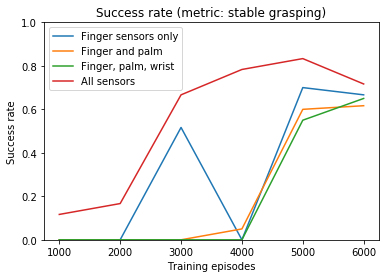

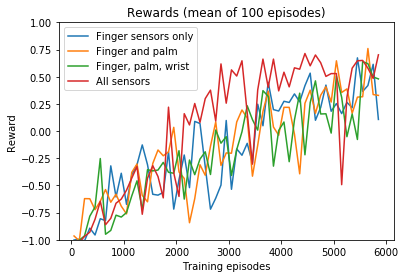

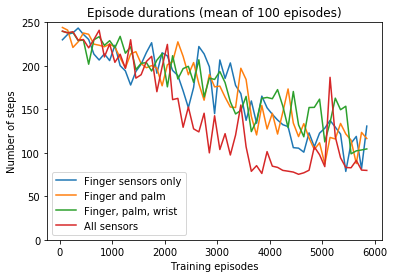

In [11]:
from matplotlib import pyplot as plt
plt.ion()

# graph of success rate
fig1, axs1 = plt.subplots(1, 1)
axs1.set_title("Success rate (metric: stable grasping)")
axs1.set(xlabel="Training episodes", ylabel="Success rate", ylim=[0, 1])

# graph of training rewards
fig2, axs2 = plt.subplots(1, 1)
axs2.set_title("Rewards (mean of 100 episodes)")
axs2.set(xlabel="Training episodes", ylabel="Reward", ylim=[-1, 1])

# graph of training duration
fig3, axs3 = plt.subplots(1, 1)
axs3.set_title("Episode durations (mean of 100 episodes)")
axs3.set(xlabel="Training episodes", ylabel="Number of steps", ylim=[0, 250])

legends=[
  "Finger sensors only",
  "Finger and palm",
  "Finger, palm, wrist",
  "All sensors"
]

for i in range(len(names)):

  # plot success rate
  axs1.plot(track_list[i].test_episodes, track_list[i].avg_stable_height, label=legends[i])

  # plot rewards
  axs2.plot(track_list[i].avgS_episodes, track_list[i].avgS_rewards, label=legends[i])
  
  # plot durations
  axs3.plot(track_list[i].avgS_episodes, track_list[i].avgS_durations, label=legends[i])

# apply legends
axs1.legend()
axs2.legend()
axs3.legend()

plt.show()